<a href="https://colab.research.google.com/github/Maha123187/Amazon_Product_Reviews_NLP_Sentimen/blob/main/Amazon_Product_Reviews_Sentiment_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing libraries
import warnings
warnings.filterwarnings('ignore')
#for importing the dataset
import pandas as pd
#For importing the model, accuracy module
from sklearn.feature_extraction.text import TfidfVectorizer
#To plot the visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# for nlp we use NLTK library
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
#import and download the dataset
data=pd.read_csv('AmazonReview.csv',encoding='utf-8')
data.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


In [4]:
#Processing and cleaning the reviews
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [6]:
#To drop the null values
data.dropna(inplace=True)
#1,2,3->negative(i.e 0)
data.loc[data['Sentiment']<=3,'Sentiment'] = 0

#4,5->positive(i.e 1)
data.loc[data['Sentiment']>3,'Sentiment'] = 1

In [11]:
#Clean the review column by removing the stopwords
stp_words=stopwords.words('english')
def clean_review(review):
  cleanreview=" ".join(word for word in review.
                       split() if word not in stp_words)
  return cleanreview

data['Review']=data['Review'].apply(clean_review)

0        Fast shipping product cheaply made I brought g...
1        This case takes long ship even worth DONT BUY!!!!
2        Good droids. Not good iPhones. You cannot use ...
3        The cable compatible macbook iphone. Also conn...
4        The case nice glow light. I'm disappointed pro...
                               ...                        
24995    These cables (lightning) far superior cables m...
24996    This unit performs exactly advertised. I use c...
24997    I key cut local hardware store cut free, progr...
24998    I love case I ordered amazon. It color looked ...
24999    Awsome!!! I loved little speaker. It great sou...
Name: Review, Length: 24999, dtype: object


In [14]:
data.head()

,Review,Sentiment
0,Fast shipping product cheaply made I brought g...,0
1,This case takes long ship even worth DONT BUY!!!!,0
2,Good droids. Not good iPhones. You cannot use ...,0
3,The cable compatible macbook iphone. Also conn...,0
4,The case nice glow light. I'm disappointed pro...,0


In [17]:
#Analyse of the
data['Sentiment'].value_counts()
#Converting text into vectors
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['Review'] ).toarray()
#Model training,Evaluation and prediction
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(X,data['Sentiment'],
                                                test_size=0.25 ,
                                                random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()

#Model fitting
model.fit(x_train,y_train)

#testing the model
pred=model.predict(x_test)

#model accuracy
print(accuracy_score(y_test,pred))

0.81632


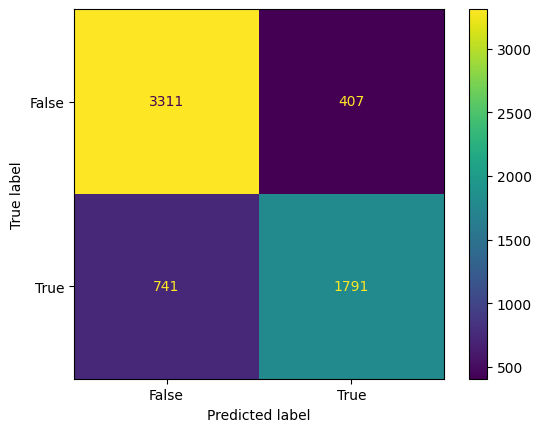

In [24]:
#Confusion matrix
from sklearn.metrics import *
cm = confusion_matrix(y_test,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                            display_labels = [False, True])

cm_display.plot()
plt.show()